# Complejidad del modelo a aprender
En este tema veremos como afecta la complejidad del modelo a nuestra capacidad de aprenderlo correctamente con los datos disponibles. Para eso utilizaremos un problem muy simple de aprendizaje supervisado: Dado un conjunto de valores de una función en algunos puntos, tratemos de calcular el resto de los valores para un intervalo dado de la recta numérica.

Algunas preguntas:
- Como selecciono el modelo que voy a entrenar?
- Mientras más complejo sea (mas grados de libertad), es mejor?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(314)

Usaremos la siguiente función para generar los valores en el intervalo de 0 a 2, dividido en 100 segmentos iguales.

In [2]:
full_x = np.linspace(0, 2, 100)

def secret(x):
  return 10*(x**1.2 - x * np.sin(x))

y = secret(full_x)
np.vstack([full_x, y])[:, :10]

array([[0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
        0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818],
       [0.        , 0.08848981, 0.1963513 , 0.30924626, 0.42336291,
        0.53675603, 0.64823098, 0.75698022, 0.86242585, 0.96413936]])

Para el problema de aprendizaje no tenemos acceso al universo completo de instancias, pues si no es aprendizaje... Entonces, tenemos que estimar todos los valores dados los valores de un pequeño conjunto de datos.

Mostremos cómo lo "ve" el algoritmo de aprendizaje

(0.0, 5.0)

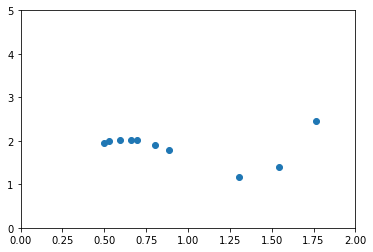

In [12]:
num_points = 10
Xs = [random.uniform(0, 2) for _ in range(num_points)]
Ys = [secret(x) for x in Xs]

plt.scatter(Xs, Ys)
# plt.plot(full_x, secret(full_x), c="red")

plt.xlim(0, 2)
plt.ylim(0, 5)

Alguien sabe cómo es la forma de la curva con esta información?

In [ ]:
# ploteados ...
_, ax = plt.subplots()
ax.scatter(full_x, y)
plt.show()

El clasificador que vamos a utilizar es uno muy simple, que es un polinomio de grado k ajustado con los valores disponibles

Pregunta 1. Qué polinomio ajustará mejor a esa función?

Pregunta 2. Depende eso de la cantidad de puntos que tengamos?

Supongamos que nos dan dos puntos de la función, y ajustaremos un polinomio de grado 1

(0.0, 5.0)

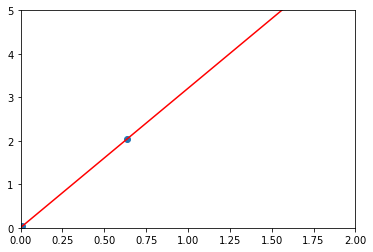

In [13]:
num_points = 2
Xs = [random.uniform(0, 2) for _ in range(num_points)]
Ys = [secret(x) for x in Xs]

p1 = np.polyfit(Xs, Ys, 1)
p1_pol = np.poly1d(p1)

plt.scatter(Xs, Ys)
plt.plot(full_x, p1_pol(full_x), c="red")

plt.xlim(0, 2)
plt.ylim(0, 5)

Estimaciones con 100 parejas de puntos

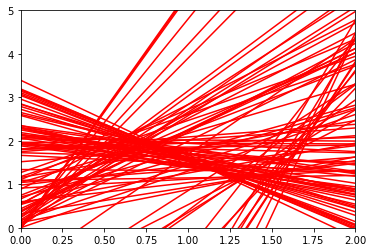

In [14]:
for _ in range(100):
  Xs = [random.uniform(0, 2) for _ in range(num_points)]
  Ys = [secret(x) for x in Xs]

  p1_pol = np.poly1d(np.polyfit(Xs, Ys, 1))

  plt.plot(full_x, p1_pol(full_x), c="red")

plt.xlim(0, 2)
plt.ylim(0, 5)
plt.show()

Estimemos el error cuadrático medio de 10000 estimaciones

In [15]:
errors = []
num_points = 2
for _ in range(10000):
  Xs = [random.uniform(0, 2) for _ in range(num_points)]
  Ys = [secret(x) for x in Xs]

  p1_pol = np.poly1d(np.polyfit(Xs, Ys, 1))

  error = sum((secret(full_x) - p1_pol(full_x)) ** 2) / len(full_x)
  errors.append(error)

print(np.mean(errors), np.var(errors), np.min(errors), np.max(errors))


4.652512722184387 132.79027455830663 0.4663086144764674 133.77603289675176


Mejoremos el código creando funciones

In [16]:
import math
def trunc_ex(n, decimals=0):
    factor = 10**decimals
    return math.trunc(n * factor) / factor

def generate_secret_points(num_points):
  Xs = [random.uniform(0, 2) for _ in range(num_points)]
  Ys = [secret(x) for x in Xs]
  return Xs, Ys

def show_one_adjusted(num_points, grade):
  Xs, Ys = generate_secret_points(num_points)

  p1_pol = np.poly1d(np.polyfit(Xs, Ys, grade))

  plt.scatter(Xs, Ys)
  plt.plot(full_x, p1_pol(full_x), c="red")

  plt.xlim(0, 2)
  plt.ylim(0, 5)

def show_many_adjusted(num_points, num_functions, grade, ax=None):
  if ax is None:
    _, ax = plt.subplots()
  for _ in range(num_functions):
    Xs, Ys = generate_secret_points(num_points)

    p1_pol = np.poly1d(np.polyfit(Xs, Ys, grade))

    # plt.scatter([x1, x2], [y1, y2])
    ax.plot(full_x, p1_pol(full_x), c="red")

    plt.xlim(0, 2)
    plt.ylim(0, 5)

def calculate_mse(num_points, num_functions, grade):
  errors = []
  for _ in range(num_functions):
    Xs, Ys = generate_secret_points(num_points)

    p1_pol = np.poly1d(np.polyfit(Xs, Ys, grade))

    error = sum((secret(full_x) - p1_pol(full_x)) ** 2) / len(full_x)
    errors.append(error)

  return trunc_ex(np.mean(errors), 4), trunc_ex(np.var(errors), 4), trunc_ex(np.min(errors), 4), trunc_ex(np.max(errors), 4)


In [17]:
calculate_mse(10, 2, 2)

(0.636, 0.0005, 0.6126, 0.6594)

Probemos con un polinomio de grado 2

/home/milton/miniconda3/envs/mlbase/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


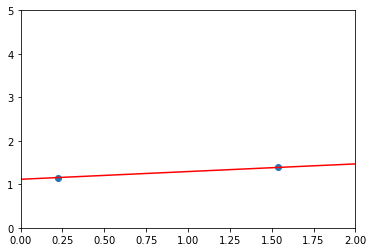

In [18]:
show_one_adjusted(2, 2)

In [19]:
# El warning nos alerta que no se puede hacer ese ajuste de forma correcta ... eliminemoslo ...
import warnings
warnings.filterwarnings('ignore')

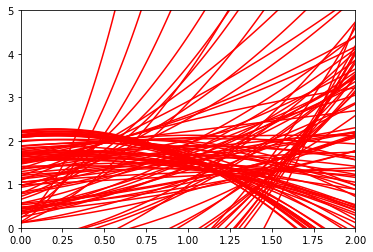

In [20]:
show_many_adjusted(2, 100, 2)
plt.show()

In [21]:
calculate_mse(2, 10000, 2)


(23.7244, 93232.0515, 0.4437, 16588.6989)

*La media es peor, pero la varianza es mucho mas alta!!*

Probemos ahora un polinomio de grado 4

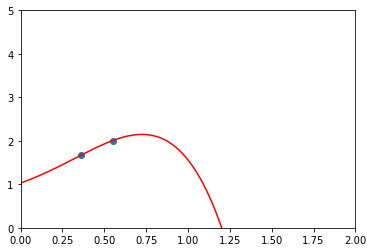

In [22]:
show_one_adjusted(2, 4)

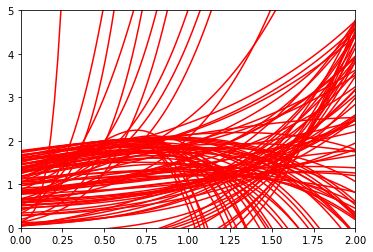

In [23]:
show_many_adjusted(2, 100, 4)

In [24]:
calculate_mse(2, 10000, 4)

(9038373266.1895, 7.43757184795634e+23, 0.3919, 86143101893888.11)

El polinomio de grado 4 tiene mayor "poder" de ajustarse correctamente a una función, pero con pocos datos el resultado esperado será mucho peor.

Que pasa con el polinomio de grado 0?

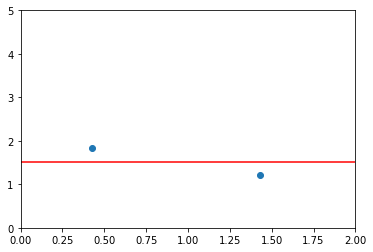

In [25]:
show_one_adjusted(2, 0)

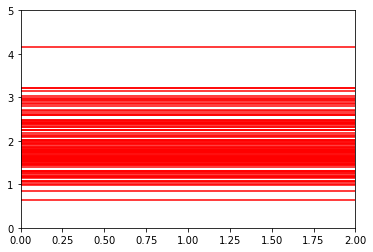

In [26]:
show_many_adjusted(2, 100, 0)

In [27]:
calculate_mse(2, 10000, 0)

(1.0612, 0.3735, 0.7275, 8.4962)

Moraleja 1. La complejidad que me puedo permitir del espacio de hipótesis está limitada por la cantidad de datos que tengo.

Supongamos ahora que tenemos más datos, por ejemplo, 8 puntos

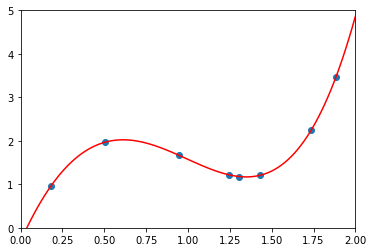

In [28]:
show_one_adjusted(8, 4)

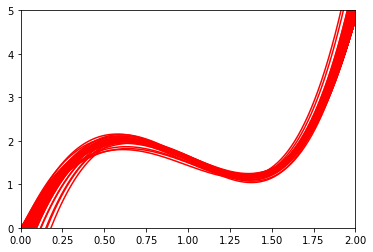

In [29]:
show_many_adjusted(8, 100, 4)

In [31]:
calculate_mse(8, 10000, 4)

(0.1054, 3.7019, 0.0008, 148.9713)

Cuál es el mejor valor de grado para una cantidad de puntos?

In [32]:
num_points = 4
errors_vars = [(degree, *calculate_mse(num_points, 10000, degree)) for degree in range(0, 8)]
errors_vars

[(0, 0.8992, 0.0729, 0.7275, 4.2677),
 (1, 1.2517, 6.9776, 0.4662, 91.3234),
 (2, 5.2448, 78.5337, 0.4273, 115.2931),
 (3, 2.6835, 2520.4556, 0.0055, 2776.7916),
 (4, 17.1048, 617291.5131, 0.0014, 72600.6321),
 (5, 35225.7552, 12097959703920.791, 0.0092, 347836443.8086),
 (6, 408062.7756, 1249092145255083.2, 0.031, 3525782168.0446),
 (7, 30616558.8283, 8.109819020685653e+18, 0.0518, 284590459695.1373)]

Para 4 puntos, sigue siendo la constante la mejor, pero ya me puedo "permitir" una recta.

Noten que el valor mínimo se mantiene estable a partir de cierto valor ... o sea, con suerte, siempre se encontrará ...

Probemos con 8 puntos

In [33]:
num_points = 8
errors_vars_8 = [(degree, *calculate_mse(num_points, 10000, degree)) for degree in range(0, 8)]

In [34]:
errors_vars_8

[(0, 0.8136, 0.0169, 0.7275, 2.4379),
 (1, 0.6649, 0.1224, 0.4662, 12.7173),
 (2, 1.6139, 6.9529, 0.4258, 89.6609),
 (3, 0.0965, 0.5361, 0.0053, 27.0024),
 (4, 0.2139, 70.2196, 0.0008, 790.1565),
 (5, 42.605, 16182716.0793, 0.0, 401900.5762),
 (6, 19.8468, 885131.9271, 0.0, 64721.5353),
 (7, 4962197074.6891, 2.462093195069171e+23, 0.0, 49621965187477.51)]

El mejor valor es ahora un polinomio de grado 3, aunque tiene mayor varianza...

Veamos con 32 puntos

In [35]:
num_points = 32
errors_vars_32 = [(degree, *calculate_mse(num_points, 10000, degree)) for degree in range(0, 14)]

In [36]:
errors_vars_32

[(0, 0.7484, 0.0009, 0.7275, 1.1962),
 (1, 0.5066, 0.0023, 0.4662, 1.0831),
 (2, 0.5123, 0.021, 0.425, 3.2461),
 (3, 0.0079, 0.0, 0.0053, 0.2388),
 (4, 0.0017, 0.0, 0.0008, 0.1631),
 (5, 0.0001, 0.0, 0.0, 0.0209),
 (6, 0.0001, 0.0, 0.0, 0.1238),
 (7, 0.0001, 0.0, 0.0, 0.1798),
 (8, 0.0006, 0.0021, 0.0, 4.6217),
 (9, 0.0005, 0.0003, 0.0, 1.3202),
 (10, 0.0025, 0.0158, 0.0, 8.8275),
 (11, 0.0045, 0.1202, 0.0, 34.5557),
 (12, 0.0271, 2.8743, 0.0, 140.1548),
 (13, 0.0481, 10.6871, 0.0, 320.5593)]

Ahora el problema parece resuelto, pero noten que el error y la varianza comienzan a aumentar ...

Veamos que pasa con las curvas ajustadas con polinomios de grado 32.

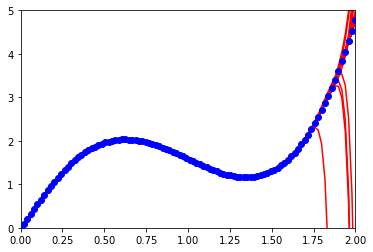

In [37]:
_, ax = plt.subplots()
show_many_adjusted(32, 100, 20, ax)
ax.scatter(full_x, y, c="blue", zorder=10000)

plt.show()

 En varios casos, el exceso de grados de libertad provoca un "sobreajuste" de la curva.

Pregunta #3. Cómo afecta todo esto la presencia de ruido?

Generemos ahora un polinómio de 3er grado

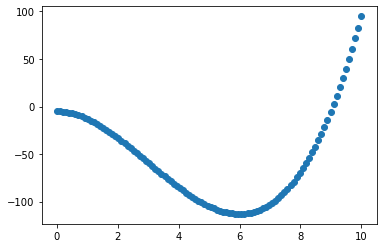

In [38]:
full_x = np.linspace(0, 10, 100)
def secret2(x):
  return x**3 - 9*x**2 - 5

plt.scatter(full_x, secret2(full_x))
plt.show()

Generamos conjuntos aleatorios de 10 puntos, y calculamos el polinomio de grado 3

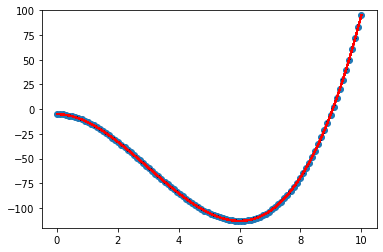

In [39]:
num_points = 10
for _ in range(100):
  Xs = [random.uniform(0, 10) for _ in range(num_points)]
  Ys = [secret2(x) for x in Xs]

  p1_pol = np.poly1d(np.polyfit(Xs, Ys, 3))

  plt.plot(full_x, p1_pol(full_x), c="red")


plt.ylim(-120, 100)
plt.scatter(full_x, secret2(full_x))
plt.show()

Probemos con un polinomio de mayor grado: 7

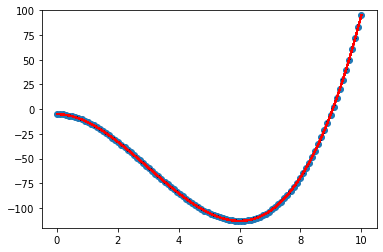

In [40]:
num_points = 10
for _ in range(100):
  Xs = [random.uniform(0, 10) for _ in range(num_points)]
  Ys = [secret2(x) for x in Xs]

  p1_pol = np.poly1d(np.polyfit(Xs, Ys, 7))

  plt.plot(full_x, p1_pol(full_x), c="red")

plt.ylim(-120, 100)
plt.scatter(full_x, secret2(full_x))
plt.show()

Nos lo podemos permitir.

Ahora introduzcamos un poco de ruido Gausiano a los puntos que tomamos.

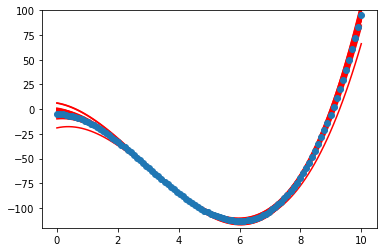

In [41]:
import random
num_points = 10
for _ in range(100):
  Xs = [random.uniform(0, 10) for _ in range(num_points)]
  Ys = [secret2(x)  + random.gauss(0, 1) for x in Xs]

  p1_pol = np.poly1d(np.polyfit(Xs, Ys, 3))

  plt.plot(full_x, p1_pol(full_x), c="red")

#plt.xlim(0, 2)
plt.ylim(-120, 100)
plt.scatter(full_x, secret2(full_x), zorder=100)
plt.show()

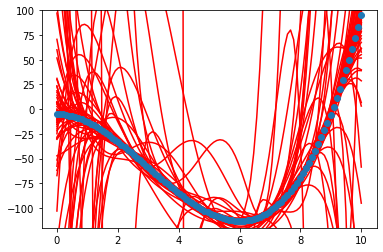

In [42]:
num_points = 10
for _ in range(100):
  Xs = [random.uniform(0, 10) for _ in range(num_points)]
  Ys = [secret2(x) + random.gauss(0, 1) for x in Xs]

  p1_pol = np.poly1d(np.polyfit(Xs, Ys, 7))

  plt.plot(full_x, p1_pol(full_x), c="red")

#plt.xlim(0, 2)
plt.ylim(-120, 100)
plt.scatter(full_x, secret2(full_x), zorder=100)
plt.show()

Como puede verse, en el modelo de polinomio de grado 7 la dispersión de modelos fue mucho mayor. 

Moraleja #2. Cuando un conjunto de hipótesis tiene mayor capacidad expresiva que la necesaria, al adicionar ruido el algoritmo de aprendizaje se ajusta al ruido y disminuye la calidad de la hipótesis final.

Como era de esperar, al adicionar más puntos mejoramos el resultado.

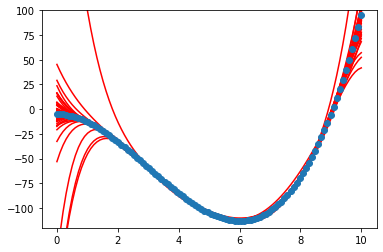

In [43]:
num_points = 20
for _ in range(100):
  Xs = [random.uniform(0, 10) for _ in range(num_points)]
  Ys = [secret2(x) + random.gauss(0, 1) for x in Xs]

  p1_pol = np.poly1d(np.polyfit(Xs, Ys, 7))

  plt.plot(full_x, p1_pol(full_x), c="red")

#plt.xlim(0, 2)
plt.ylim(-120, 100)
plt.scatter(full_x, secret2(full_x), zorder=100)
plt.show()

## Conclusiones
Para elegir un buen modelo hay que tomar en cuenta:
- la complejidad del problema: mientras mas complejo el problema, mas grados de libertad necesito para aprenderlo
- la cantidad de datos de entrenamiento disponible: mientras menos datos tengo, menos grados de libertad puedo permitirme para poder hacer una estimación fiable del modelo
- la presencia de ruido afecta notablemente a los modelos que tienen mas grados de libertad de los necesarios